<a href="https://colab.research.google.com/github/Nsimaar99/Kaggle-Project/blob/master/MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

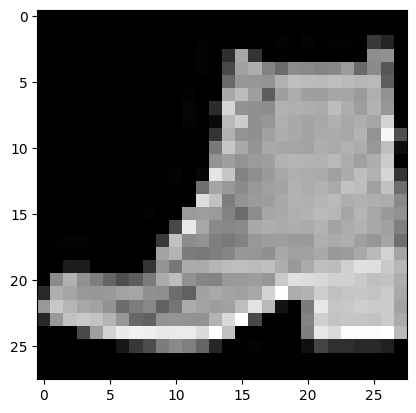

In [2]:
image, label = next(iter(trainloader))

# Reshape and display the image using matplotlib
plt.imshow(image[0, :].numpy().squeeze(), cmap='gray')
plt.show()

In [7]:
import torch.nn as nn

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.dropout1 = nn.Dropout(0.4)  # Dropout with a probability of 40%
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.4)  # Dropout with a probability of 40%
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.dropout1(x)  # Apply dropout after activation
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.dropout2(x)  # Apply dropout after activation
        x = self.fc3(x)
        return x


In [8]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Initialize the model
model = Classifier()  # Ensure Classifier is defined with necessary parameters

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust learning rate if needed

# Print model summary (optional)
print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.4, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Epoch 1/10
Training Loss: 0.6908
Test Loss: 0.4717, Accuracy: 82.27%
Epoch 2/10
Training Loss: 0.5146
Test Loss: 0.4271, Accuracy: 84.18%
Epoch 3/10
Training Loss: 0.4758
Test Loss: 0.4110, Accuracy: 85.24%
Epoch 4/10
Training Loss: 0.4530
Test Loss: 0.4034, Accuracy: 85.19%
Epoch 5/10
Training Loss: 0.4365
Test Loss: 0.4091, Accuracy: 85.03%
Epoch 6/10
Training Loss: 0.4215
Test Loss: 0.3905, Accuracy: 85.64%
Epoch 7/10
Training Loss: 0.4131
Test Loss: 0.3800, Accuracy: 85.83%
Epoch 8/10
Training Loss: 0.4070
Test Loss: 0.3749, Accuracy: 86.23%
Epoch 9/10
Training Loss: 0.4004
Test Loss: 0.3722, Accuracy: 86.69%
Epoch 10/10
Training Loss: 0.3917
Test Loss: 0.3696, Accuracy: 86.66%


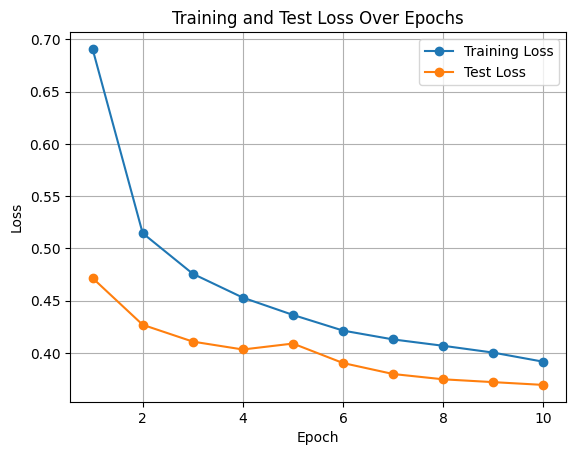

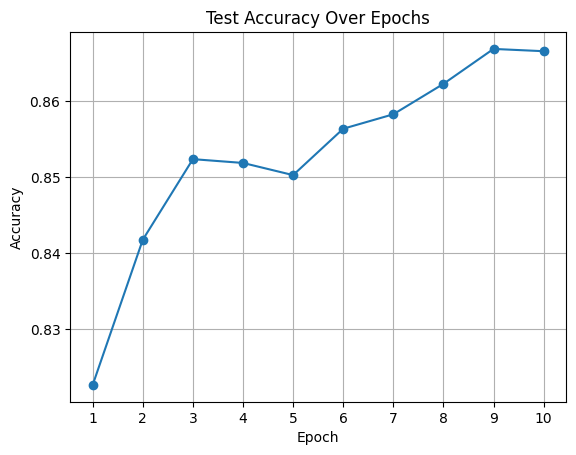

In [9]:
# Set the number of epochs
epochs = 10

# Track training and test losses
train_losses = []
test_losses = []
accuracies = []

# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0

    # Training phase
    for images, labels in trainloader:
        images = images.view(images.size(0), -1)  # Flatten images to (batch_size, 784)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        logits = model(images)

        # Calculate the loss
        loss = criterion(logits, labels)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        # Accumulate the running loss
        running_loss += loss.item()

    # Calculate and store the average training loss for this epoch
    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)

    # Evaluation phase
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():  # No gradients needed during evaluation
        for images, labels in testloader:  # Iterate through the testloader
            images = images.view(images.size(0), -1)  # Flatten images to (batch_size, 784)

            # Forward pass through the network
            logits = model(images)

            # Compute the test loss
            loss = criterion(logits, labels)
            test_loss += loss.item()

            # Calculate the accuracy
            ps = torch.softmax(logits, dim=-1)  # Get probabilities using softmax
            top_p, top_class = ps.topk(1, dim=1)  # Get the index of the class with the highest probability
            correct += (top_class == labels.view(*top_class.shape)).sum().item()  # Compare predictions
            total += labels.size(0)  # Track total number of labels

    # Calculate the average test loss and accuracy for this epoch
    avg_test_loss = test_loss / len(testloader)
    test_losses.append(avg_test_loss)
    accuracy = correct / total
    accuracies.append(accuracy)

    # Print training and test loss, and accuracy after each epoch
    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Training Loss: {avg_train_loss:.4f}")
    print(f"Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

# Optionally: Plotting training and test loss over epochs
import matplotlib.pyplot as plt

# Plot training and test loss
plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, marker='o', label='Test Loss')
plt.title('Training and Test Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot accuracy over epochs
plt.plot(range(1, epochs + 1), accuracies, marker='o', label='Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, epochs + 1))
plt.grid()
plt.show()


In [11]:
def save_checkpoint(model, optimizer, epoch, loss, filepath='checkpoint.pth'):
    """
    Save the model checkpoint.

    Parameters:
    - model: The model to save.
    - optimizer: The optimizer to save.
    - epoch: The current epoch number.
    - loss: The current loss value.
    - filepath: The path to save the checkpoint.
    """
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'epoch': epoch,
        'loss': loss
    }
    torch.save(checkpoint, filepath)
    print(f'Model checkpoint saved to {filepath}')


In [12]:
# Assuming `model`, `optimizer`, `epoch`, and `running_loss` are defined
save_checkpoint(model, optimizer, epoch, running_loss, filepath='checkpoint.pth')

Model checkpoint saved to checkpoint.pth


In [14]:
def load_checkpoint(filepath, model, optimizer):
    """
    Load the model checkpoint.

    Parameters:
    - filepath: The path to the checkpoint.
    - model: The model to load the state dict into.
    - optimizer: The optimizer to load the state dict into.

    Returns:
    - epoch: The epoch number when the checkpoint was saved.
    - loss: The loss value when the checkpoint was saved.
    """
    checkpoint = torch.load(filepath)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']

    print(f'Model checkpoint loaded from {filepath}')
    return epoch, loss


In [15]:
# Create a new model and optimizer instance
model = Classifier()  # Replace with your model class
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Load the checkpoint
epoch, loss = load_checkpoint('checkpoint.pth', model, optimizer)


Model checkpoint loaded from checkpoint.pth


<ipython-input-14-e774ab79a797>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)
